<a href="https://colab.research.google.com/github/mohananup/cifar_MNIST/blob/main/cifar_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout

In [3]:
nc = 10 # Number of classes


#CIFAR is an acronym that stands for the Canadian
#Institute For Advanced Research and the CIFAR-10
#dataset was developed along with the CIFAR-100
#dataset by researchers at the CIFAR institute.

#The dataset is comprised of 60,000 32×32
#pixel color photographs of objects from 10 classes,
#such as frogs, birds, cats, ships, etc.
#The class labels and their standard associated
#integer values are listed below.

#0: airplane
#1: automobile
#2: bird
#3: cat
#4: deer
#5: dog
#6: frog
#7: horse
#8: ship
#9: truck

(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()

In [7]:
print("training images shape", Xtrain.shape, type(Xtrain), Xtrain.dtype)
print("training labels shape", ytrain.shape)
print("testing images shape", Xtest.shape)
print("testing labels shape", ytest.shape)

training images shape (50000, 32, 32, 3) <class 'numpy.ndarray'> float32
training labels shape (50000, 1)
testing images shape (10000, 32, 32, 3)
testing labels shape (10000, 1)


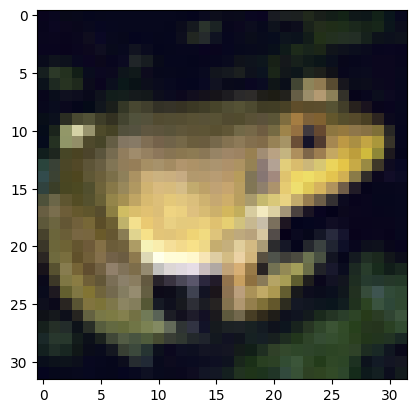

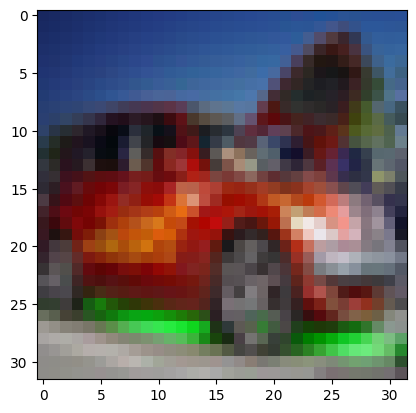

In [5]:
#Show sample images
plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

plt.figure(2)
imgplot2 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

In [6]:
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain/ 255.0
Xtest = Xtest.astype('float32')
Xtest = Xtest / 255.0


In [8]:
ytrain = ytrain[:,0]
ytrainEnc = tf.one_hot(ytrain, depth=nc)
ytest = ytest[:,0]
ytestEnc = tf.one_hot(ytest, depth=nc)

In [ ]:
ypred = model.predict(Xtest)
ypred = np.argmax(ypred,axis=1)

score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'],'g-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Training Loss vs Epochs')
plt.show()

import matplotlib.pyplot as plt
plt.plot(range(1, len(history.history['loss']) + 1), history.history['accuracy'],'b-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.grid(1,which='both')
plt.suptitle('Training Accuracy vs Epochs')
plt.show()

import matplotlib.pyplot as plt
plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'],'g-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Validation Loss vs Epochs')
plt.show()

import matplotlib.pyplot as plt
plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_accuracy'],'b-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(1,which='both')
plt.suptitle('Validation Accuracy vs Epochs')
plt.show()